In [2]:
import cv2
import numpy as np

In [3]:
img=cv2.imread("imori.jpg")

In [12]:
def MeanFilter(img, K_size=3):
    H,W,C=img.shape
    pad = K_size//2
    output=np.zeros((H+pad*2,W+pad*2,C),dtype=np.float)
    output[pad:pad+H,pad:pad+W]=img.copy().astype(np.float)
    
    tmp=output.copy()
    for h in range(H):
        for w in range(W):
            for c in range(C):
                output[pad+h,pad+w,c]=np.mean(tmp[h:h+K_size, w:w+K_size, c])
    
    return output[pad:pad+H,pad:pad+W]

In [13]:
ans1=img.copy()
ans1=MeanFilter(ans1)
cv2.imwrite("ans1.jpg",ans1)

True

In [14]:
def MotionFilter(img,K_size=3):
    H,W,C=img.shape
    pad=K_size//2
    output=np.zeros((H+pad*2,W+pad*2,C),dtype=np.float)
    output[pad:pad+H, pad:pad+W]=img.copy().astype(np.float)
    
    K=np.zeros((K_size,K_size),dtype=np.float)
    for i in range(K_size):
        K[i][i]=1/K_size
    
    tmp=output.copy()
    for h in range(H):
        for w in range(W):
            for c in range(C):
                output[pad+h,pad+w,c]=np.sum(tmp[h:h+K_size,w:w+K_size,c]*K)
                
    return output[pad:pad+H, pad:pad+W]

In [17]:
ans2=img.copy()
ans2=MotionFilter(ans2,3)
cv2.imwrite("ans2.jpg",ans2)

True

In [5]:
def BGR2GRAY(img):
    b=img[:,:,0].copy()
    g=img[:,:,1].copy()
    r=img[:,:,2].copy()
    
    out=0.2126*r+0.7152*g+0.0722*b
    out=out.astype(np.uint8)
    return out

def max_min_filter(img,K_size=3):
    if len(img.shape)==3:#for rgb
        H,W,C=img.shape
        
        pad=K_size//2
        out=np.zeros((pad*2+H,pad*2+W,C),dtype=np.float)
        out[pad:pad+H,pad:pad+W]=img.copy().astype(np.float)
        tmp=out.copy()
        
        for h in range(H):
            for w in range(W):
                for c in range(C):
                    out[pad+h,pad+w,c]=np.max(tmp[h:h+K_size,w:w+K_size,c])-np.min(tmp[h:h+K_size,w:w+K_size,c])
    else:#for gray
        H,W=img.shape
        pad=K_size//2
        out=np.zeros((pad*2+H,pad*2+W),dtype=np.float)
        out[pad:pad+H,pad:pad+W]=img.copy().astype(np.float)
        tmp=out.copy()
        
        for h in range(H):
            for w in range(W):
                out[pad+h,pad+w]=np.max(tmp[h:h+K_size,w:w+K_size])-np.min(tmp[h:h+K_size,w:w+K_size])
        
                    
    return out[pad:pad+H,pad:pad+W]

In [4]:
ans3=img.copy()
ans3gray=BGR2GRAY(ans3)
ans3gray=max_min_filter(ans3gray)
cv2.imwrite("ans3gray.jpg",ans3gray)

True

In [5]:
ans3rgb=ans3.copy()
ans3rgb=max_min_filter(ans3rgb)
cv2.imwrite("ans3rgb.jpg",ans3rgb)

True

In [55]:
def different_filter(gray,K_size=3,direction=0):#axis=0の時は縦方向の微分
    H,W=gray.shape
    pad=K_size//2
    out=np.zeros((H+2*pad,W+2*pad),dtype=np.float)
    out[pad:pad+H,pad:pad+W]=gray.copy().astype(np.float)
    tmp=out.copy()
    
    K=[[[0.,-1,0.],[0.,1,0.],[0.,0.,0.]],[[0.,0.,0.],[-1,1,0.],[0.,0.,0.]]]
    for h in range(H):
        for w in range(W):
            out[pad+h,pad+w]=np.sum((tmp[h:h+K_size,w:w+K_size])*K[direction])
                
    out=np.clip(out,0,255)
    return out[pad:pad+H,pad:pad+W].astype(np.uint8)

In [56]:
ans4=BGR2GRAY(img.copy())
ans4verti=different_filter(ans4.copy(),direction=0)
ans4hori=different_filter(ans4.copy(),direction=1)
cv2.imwrite("ans4verti.jpg",ans4verti)
cv2.imwrite("ans4hori.jpg",ans4hori)

True

In [70]:
#sobelフィルタは縦or横方向の微分とそれと直行する方向の平滑化を組み合わせたもの
def sobelfilter(gray,K_size=3,direction=0):
    H,W=gray.shape
    pad=K_size//2
    out=np.zeros((H+2*pad,W+2*pad),dtype=np.float)
    out[pad:pad+H,pad:pad+W]=gray.copy().astype(np.float)
    tmp=out.copy()
    
    K=[[[1,2,1],[0.,0.,0.],[-1,-2,-1]],[[1,0.,-1],[2,0.,-2],[1,0.,-1]]]
    for h in range(H):
        for w in range(W):
            out[pad+h,pad+w]=np.sum((tmp[h:h+K_size,w:w+K_size])*K[direction])
                
    out=np.clip(out,0,255)
    return out[pad:pad+H,pad:pad+W].astype(np.uint8)

In [71]:
ans5=BGR2GRAY(img.copy())
ans5verti=sobelfilter(ans5.copy(),direction=0)
ans5hori=sobelfilter(ans5.copy(),direction=1)
cv2.imwrite("ans5verti.jpg",ans5verti)
cv2.imwrite("ans5hori.jpg",ans5hori)

True

In [72]:
def PrewittFilter(gray,K_size=3,direction=0):
    H,W=gray.shape
    pad=K_size//2
    out=np.zeros((H+2*pad,W+2*pad),dtype=np.float)
    out[pad:pad+H,pad:pad+W]=gray.copy().astype(np.float)
    tmp=out.copy()
    
    K=[[[-1,-1,-1],[0.,0.,0.],[1,1,1]],[[-1,0.,1],[-1,0.,1],[-1,0.,1]]]
    for h in range(H):
        for w in range(W):
            out[pad+h,pad+w]=np.sum((tmp[h:h+K_size,w:w+K_size])*K[direction])
                
    out=np.clip(out,0,255)
    return out[pad:pad+H,pad:pad+W].astype(np.uint8)

In [73]:
ans6=BGR2GRAY(img.copy())
ans6verti=PrewittFilter(ans6.copy(),direction=0)
ans6hori=PrewittFilter(ans6.copy(),direction=1)
cv2.imwrite("ans6verti.jpg",ans6verti)
cv2.imwrite("ans6hori.jpg",ans6hori)

True

In [90]:
def LaplacianFileter(gray,K_size=3,negaposi=0):
    H,W=gray.shape
    pad=K_size//2
    out=np.zeros((H+2*pad,W+2*pad),dtype=np.float)
    out[pad:pad+H,pad:pad+W]=gray.copy().astype(np.float)
    tmp=out.copy()
    
    K=[[0.,1,0.],[1,-4,1],[0.,1,0.]]
    for h in range(H):
        for w in range(W):
            out[pad+h,pad+w]=np.sum((tmp[h:h+K_size,w:w+K_size])*K)
    if negaposi==0:           
        out=np.clip(out,0,255)
    else:
        out[out<=-70]=0
        out[out>70]=255
        out=np.clip(out,0,255)
        
    return out[pad:pad+H,pad:pad+W].astype(np.uint8)

In [91]:
ans7=BGR2GRAY(img.copy())
ans7plain=LaplacianFileter(ans7.copy())
cv2.imwrite("ans7plain.jpg",ans7plain)
ans7negaposi=LaplacianFileter(ans7.copy(),negaposi=1)
cv2.imwrite("ans7negaposi.jpg",ans7negaposi)

True

In [98]:
def EmbossFilter(gray,K_size=3):
    H,W=gray.shape
    pad=K_size//2
    out=np.zeros((H+pad*2,W+pad*2),dtype=(np.float))
    out[pad:pad+H,pad:pad+W]=gray.copy().astype(np.float)
    tmp=out.copy()
    
    K=[[-2,-1,0.],[-1,1,1],[0.,1,2]]
    for h in range(H):
        for w in range(W):
            out[pad+h,pad+w]=np.sum(K*tmp[h:h+K_size,w:w+K_size])
            
    out=np.clip(out,0,255)
    
    return out[pad:pad+H,pad:pad+W].astype(np.uint8)

In [99]:
ans8=BGR2GRAY(img.copy())
ans8=EmbossFilter(ans8.copy())
cv2.imwrite("ans8.jpg",ans8)

True

In [10]:
def LogFunc(x,y,sigma=3):
    upper=(x*x+y*y-sigma*sigma)*np.exp(-(x*x+y*y))
    lower=(2*np.pi*(sigma**6))*(2*sigma**2)
    return upper/lower
    
def LoGFilter(gray,K_size=5,sigma=3):
    H,W=gray.shape
    pad=K_size//2
    out=np.zeros((pad*2+H,pad*2+W),dtype=np.float)
    out[pad:pad+H,pad:pad+W]=gray.copy().astype(np.float)
    tmp=out.copy()
    
    K=np.zeros((K_size,K_size),dtype=np.float)
    for h in range(K_size):
        for w in range(K_size):
            K[h,w]=LogFunc(h-pad,w-pad,sigma)
    K/=K.sum()
    
    
    for h in range(H):
        for w in range(W):
            out[pad+h,pad+w]=np.sum(tmp[h:h+K_size,w:w+K_size]*K)
    out=np.clip(out,0,255)
    return out[pad:pad+H,pad:pad+W].astype(np.uint8)

In [13]:
noise_img=cv2.imread("imori_noise.jpg")
ans9=noise_img.copy()
ans9=BGR2GRAY(ans9.copy())
ans9=LoGFilter(ans9.copy())
cv2.imwrite("ans9.jpg",ans9)

True

In [14]:
import matplotlib.pyplot as plt

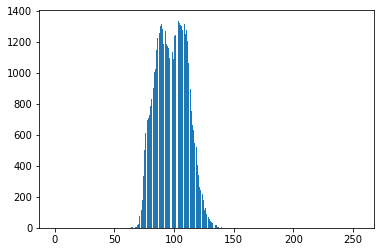

In [28]:
dark_img=cv2.imread("imori_dark.jpg").astype(np.float)
plt.hist(dark_img.ravel(),bins=255,rwidth=0.8,range=(0,255))
plt.savefig("ans10.png")
plt.show()